# Tasty Bites Scenario

This project explores how to improve website traffic for the **fictitious** company ***Tasty Bite***.

## About Tasty Bites

<img src="../images/tasty_bites.png"></img>

Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted inspiration so we decided to provide it. We started life as a search engine for recipes, helping people to find ways to use up the limited supplies they had at home.

Now, over two years on, we are a fully fledged business. For a monthly subscription we will put together a full meal plan to ensure you and your family are getting a healthy, balanced diet whatever your budget. Subscribe to our premium plan and we will also deliver the ingredients to your door.

## Business Problem

Email messages snippets:

**From Head of Data Science:**
<i><q>They want us to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. I don’t think that is realistic in the time we have, but do your best and present what ever you find.</q><i>

**From Product Manager - Recipe Discovery**

<i><q>At the moment, I choose my favorite recipe from a selection and display that on the home page. We have noticed that traffic to the rest of the website goes up by as much as 40% if I pick a popular recipe. But I don’t know how to decide if a recipe will be popular. More traffic means more subscriptions so this is really important to the company.

Can your team:
</q></i>

<ul>
  <li>Predict which recipes will lead to hight raffic?</li>
  <li>Correctly predict high traffic recipes 80% of the time?</li>
</ul>





# Data Validation

There are 947 rows and 8 columns in the original data. The data is tidy, i.e. each row is a sample and each column is a feature.

## Duplicate samples

Each row of the data has a unique recipe number which implies there are no duplicates. However, I checked for cases where duplicates might exist with different recipe numbers. Two types of these duplicates were investigated:

1. all but recipe columns (ABRC) - samples are considered to be duplicates when they have the same values in all but the `recipe` column of the original data.
2. calories, carbohydrate, sugar, and protein (CCSP) columns - samples are considered to be duplicates when they have the same calories, carbohydrate, sugar, and protein values.

All ABRC duplicates were also found to be CCSP duplicates, In other words, the missing `calories`, `carbohydrate`, `sugar`, and `protein` values are the only columns driving these two types of duplicate record counts. Since there were no duplicate records in the samples that had no missing values and this represents about 94.5% of the data, I assumed that each value in the the recipe column does indeed represent a unique recipe which implies no duplicates exist in the data with missing values as well. **In summary, there are no duplicate records in the data.**

## How each column was preprocessed

Columns are described and processed as follows:
+ **recipe**: This is a number that identifies each recipe.
  + This is neither a predictor or target variable.
  + It's only purpose is as an identifier.
  + There are no missing values.
  + <font color="green">No cleaning is needed.</font>
+ **calories**, **carbohydrate**, **sugar**, **protein** (CCSP): These are calories, grams of carbohydrates, grams of sugar and grams of protein respectively.
  + These are quantitative independent or predictor variables.
  + There are 376 of these values that are inconsistent because they show more calories from carb's, sugar and protien combined than the total calories. This effects about 40% of the samples.
  + It is not known whether `calories` are too low or if `carbohydrate`, `sugar`, and/or `protein` are too high. I assumed that `calories` values are incorrect and dropped this feature. I futher assume that the other three features are correct and kept them in the analysis.
  + The example recipe (tomato soup) specifies that each of these quantities are ***(per serving)***, so it is assumed that each of these values are reported **per serving** as defined by the [FDA](https://www.fda.gov/food/nutrition-facts-label/serving-size-nutrition-facts-label).
  + Except for the inconsistent samples, these values appear to fall within reasonable ranges.
  + Besides the target (which will be discussed later), these are the only columns that have missing values.
  + These values go missing as a group. When any one of these 4 is missing, the other 3 are missing as well.
  + Samples with missing values make up 5.5% (52 out of 947) of the data. This proportion is not quite low enough to justify dropping them, so these values were imputed.
  + Since the available evidence suggest that these values are **Missing at Random (MAR)**, a linear regression model is used to impute the `carbohydrate`, `sugar`, and `protein` missing values.
  + Because the distribution of the `carbohydrate`, `sugar`, and `protein` (CSP) values are skewed right, a (natural) log transformation was applied to them as part of building the imputation model. The untransformed values are later used as predictors when building the logistic regression and decision tree models to predict whether recipes will be high traffic or not.
+ **category**: This a general categorical designation of the recipe. The data dictionary describes 10 categories. However, 11 categories where actually found in the original data:  
*Beverages*, *Breakfast*, *Chicken*, *Chicken Breast <font color="red">(not in data dictionary)</font>*, *Dessert*, *Lunch/Snacks*, *Meat*, *One Dish Meal*, *Pork*, *Potato*, *Vegetable*
  + This is a categorical independent or predictor variable with 11 levels (described above).
  + I decided not to combine the *Chicken* and *Chicken Breast* categories because the later was found (see EDA section) to correspond to a larger portion of the positive (**High**) class.
  + Because this is a categorical variable with no oridinal relationship between the levels, they were one-hot encoded prior to creating the models.
  + The space and / in categories like `Chicken Breast`, `Lunch/Snack` and `One Dish Meal` were removed for convenience in naming the encoded levels.
+ **servings**: As defined by the [FDA](https://www.fda.gov/food/nutrition-facts-label/serving-size-nutrition-facts-label), a serving is a standard unit of measure based on the amount of food people typically consume
  + This is a quantitative independent or predictor variable.
  + Values for this variable are 1, 2, 4, and 6.
  + Values were converted from strings to numbers (integers).
  + Two values are listed as "4 as a snack" and one as "6 as a snack" in the original data. The *... as a snack* samples are dropped from the data for the following reasons:
    1. The phrase *"as a snack"* typically implies somethings smaller than a normal *serving*, but by how much is ambiguous.
    2. Out of 947 total, 3 samples represents less than 1/2 percent of the data.
    3. This variable is not expected to be a strong predictor because recipe portions can be adjusted to make more or less, so it only serves to provide additional information.
+ **high_traffic**: This is the target or the dependent variable we want to predict.
  + Original data contains either the word *High* (positive class) or is a missing value (assumed to be the negative class).
  + Because missing values are assumed to be the negative class, they were initally imputed as *NOT High*.
  + Values were later converted from strings into binary values where: **1 = High traffic** and **0 = NOT High traffic**
  + A little over 1/3 of the values are ***NOT High***, so no serious class imbalance exists.

## Data validation assumptions
+ Although at least 376 samples have problematic values for `calories`, `carbohydrate`, `sugar`, and `protein`, the `category` and `high_traffic` columns are assumed to be accurate
+ The `calories` column was assumed to be the only problem with the `calories`, `carbohydrate`, `sugar`, and `protein` group of variables, so the `calories` feature was dropped and the other 3 were retained.
+ All the missing values in the `high_traffic` column are not actually missing values. They represent recipes that are **NOT** *High* traffic.
+ The `Chicken` and `Chicken Breast` categories are mutually exclusive. In other words, all of the `Chicken` recipes use other parts of the chicken besides the breast meat (e.g. thighs, wings, drumsticks, etc.)
+ The values for **calories**, **carbohydrate**, **sugar** and **protein** are listed **per serving** as described in the example provided with the data dictionary.


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime as dt
# for imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import BayesianRidge
# for model development
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split, \
                                    RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score
from sklearn.utils import resample

In [2]:
# read data and see how it comes in
df = pd.read_csv('../data/recipe_site_traffic_2212.csv')
df.info()
print(f"\nRecipes numbers range from {df['recipe'].min()} to {df['recipe'].max()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB

Recipes numbers range from 1 to 947


## Fixing the `high_traffic` values and checking for duplicates

As described above, two types of duplicates are investigated which differ by different groups of columns: 1) all but recipe columns (ABRC) and 2) calories, carbohydrate, sugar, and protein (CCSP) columns. The only duplicates that were found had different recipe numbers but had missing CCSP values. This lead me to conclude that each recipe was indeed unique and that there are no duplicate samples in the data. The next few cells validate this observation.

The first step in exploring duplicates was to fix the `high_traffic` (target) column because missing values in this column are assumed to have a specific meaning (NOT High traffic).

In [3]:
print(df.head(), '\n')
print(df['high_traffic'].value_counts(dropna=False), '\n')

   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN   

high_traffic
High    574
NaN     373
Name: count, dtype: int64 



In [4]:
# fix missing values in high_traffic column which we assume are are 'NOT High'
df['high_traffic'] = df['high_traffic'].fillna('NOT High')
print(df['high_traffic'].value_counts(dropna=False))

high_traffic
High        574
NOT High    373
Name: count, dtype: int64


In [5]:
# check for duplicate CCSP and ABRC groupings
ccsp = ['calories', 'carbohydrate', 'sugar', 'protein']
abrc = ccsp + ['category', 'servings', 'high_traffic']  # all but recipe column

In [6]:
dupes_abrc = df.duplicated(subset=abrc, keep=False)
dupes_ccsp = df.duplicated(subset=ccsp, keep=False)
abcr_and_ccsp = np.logical_and(dupes_abrc, dupes_ccsp)
print(f"Number of unique recipes: {df['recipe'].nunique()} out of {df.shape[0]} rows/samples of data")
print(f"Number of CCSP duplicates:                          {int(dupes_ccsp.sum())}")
print(f"Number of ABRC duplicates:                          {int(dupes_abrc.sum())}")
print(f"Number of ABRC duplicates that are CCSP duplicates: {int(abcr_and_ccsp.sum())}")

Number of unique recipes: 947 out of 947 rows/samples of data
Number of CCSP duplicates:                          52
Number of ABRC duplicates:                          36
Number of ABRC duplicates that are CCSP duplicates: 36


## Clean the `servings` columns

The non-missing data needs to be cleaned up before imputing the missing values. The `servings` column originally shows string values of 1, 2, 4, 6 for most of the sample. However, two samples with *"4 as a snack"* and a single sample with *"6 as a snack"* also show up. As described above, the three total *"x as a snack"* samples were dropped and this column was converted to numeric (integer).

In [7]:
# look at the servings column
print(df['servings'].value_counts(dropna=False).sort_index(), '\n')
# remove the "as a snack" samples
df = df.loc[~df['servings'].str.contains("as a snack")].copy()
# verify records are dropped and column converted to integer
df['servings'] = df['servings'].astype("int")
print(df['servings'].value_counts(dropna=False).sort_index(), '\n')

servings
1               175
2               183
4               389
4 as a snack      2
6               197
6 as a snack      1
Name: count, dtype: int64 

servings
1    175
2    183
4    389
6    197
Name: count, dtype: int64 



## Clean the categories

The next cell was not strictly needed, but was done to improve readability later when they the `category` variable was one-hot encoded.

In [8]:
df['category'] = df['category'].apply(lambda x: x.replace(' ', '') if ' ' in x else x)
df['category'] = df['category'].apply(lambda x: x.replace('/', '') if '/' in x else x)
df['category'].value_counts()

category
Breakfast        106
ChickenBreast     98
Beverages         92
Potato            88
LunchSnacks       86
Pork              84
Vegetable         83
Dessert           83
Meat              79
Chicken           74
OneDishMeal       71
Name: count, dtype: int64

In [9]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NOT High
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NOT High


## Validating quantitative predictors

### Problems with `calories` data

If the `calories` data is truly per serving as is described in the example provided for this project, then 376 samples have inconsistencies in their `calories`, `carbohydrate`, `sugar`, and `protein` values. [There are roughly 4 calories per gram of carbohydrate, protein](https://www.nal.usda.gov/programs/fnic), or [sugar](https://fdc.nal.usda.gov/food-details/169655/nutrients) according the USDA. If we add up the `carbohydrate`, `sugar`, and `protein` columns and multiply by 4, this value should be **less than the total calories shown in the calories column**. Unfortunately, there are 376 samples in the data where **the total calories per serving is less than the calories per serving from carbohydrate, sugar, and protein combined.** 

### Summary of quantitative predictors

+ There are 376 samples <font color="red">(red shaded area of historgram)</font> that have more calories from carbohydrates, sugar and protein than total calories.
+ The `calories` column is dropped, but the `carbohydrates`, `sugar` and `protein` columns are assumed to be ok.
+ All provided data variables are positive.
+ Samples values appear to be within a reasonable range.
+ A few samples seem very high, but not extreme enough to justify dropping them.

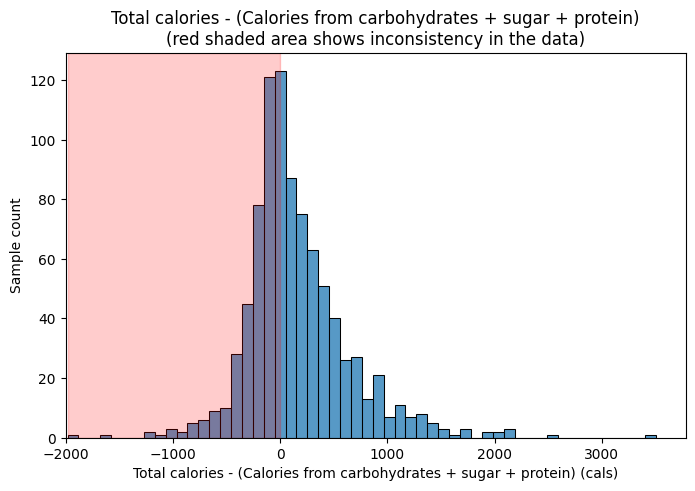

In [10]:
# create df with samples that have no missing values
df_no_missing = df.dropna().copy()

# check if calories are consistent
cal_per_gram = 4.
df_no_missing['non_csp_cals'] = df_no_missing['calories'] - \
                                 (cal_per_gram * (df_no_missing['carbohydrate'] + \
                                                  df_no_missing['sugar'] + \
                                                  df_no_missing['protein']))
# There should be no negative values in this histogram, but there are...
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_no_missing['non_csp_cals'], ax=ax)
ax.set_xlabel("Total calories - (Calories from carbohydrates + sugar + protein) (cals)")
ax.set_ylabel("Sample count")
ax.set_title('Total calories - (Calories from carbohydrates + sugar + protein)\n(red shaded area shows inconsistency in the data)')
# Add shading for the region where x is less than 0
ax.axvspan(xmin=df_no_missing['non_csp_cals'].min(), xmax=0, 
           color='red', alpha=0.2, label='Potential Data Error')
ax.set_xlim(left=-2000)

plt.show()

In [11]:
df_neg_cals = df_no_missing.loc[df_no_missing['non_csp_cals'] < 0, :]
print(f"\nThere are {df_neg_cals.shape[0]} samples that have more calaries from carbs, sugar and protein then there are total calories.\n")
print(df_neg_cals.describe())
df_neg_cals.head()


There are 376 samples that have more calaries from carbs, sugar and protein then there are total calories.

           recipe    calories  carbohydrate       sugar     protein  \
count  376.000000  376.000000    376.000000  376.000000  376.000000   
mean   477.585106  151.507314     50.669920   12.335612   30.731915   
std    277.288756  154.544433     56.910574   19.446504   46.045435   
min      2.000000    0.140000      0.130000    0.010000    0.000000   
25%    228.750000   44.715000     15.495000    2.080000    3.750000   
50%    486.500000  100.825000     33.200000    5.380000   12.060000   
75%    726.250000  208.645000     61.790000   12.577500   38.517500   
max    947.000000  960.750000    530.420000  148.750000  363.360000   

         servings  non_csp_cals  
count  376.000000    376.000000  
mean     3.510638   -223.442473  
std      1.682821    238.399108  
min      1.000000  -1982.160000  
25%      2.000000   -283.630000  
50%      4.000000   -158.155000  
75%      4.00

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,non_csp_cals
1,2,35.48,38.56,0.66,0.92,Potato,4,High,-125.08
3,4,97.03,30.56,38.63,0.02,Beverages,4,High,-179.81
6,7,183.94,47.95,9.75,46.71,ChickenBreast,4,NOT High,-233.70
9,10,248.28,48.54,3.99,113.85,Chicken,2,NOT High,-417.24
13,14,25.23,11.51,10.32,9.57,Vegetable,4,High,-100.37


In [12]:
# convert categorical category column so we can account for missing categories if they arise
cats=sorted(list(df['category'].unique()))
all_categories = pd.CategoricalDtype(cats, ordered=True)
df['category_cat'] = df['category'].astype(all_categories)
# inspect remaining quantitative variables
print(df_no_missing.shape)
df_no_missing[['carbohydrate', 'sugar', 'protein', 'servings']].describe()

(892, 9)


,carbohydrate,sugar,protein,servings
count,892.000000,892.000000,892.000000,892.000000
mean,35.062971,9.043206,24.142018,3.454036
std,44.005332,14.699529,36.429244,1.736618
min,0.030000,0.010000,0.000000,1.000000
25%,8.320000,1.687500,3.177500,2.000000
50%,21.480000,4.545000,10.775000,4.000000
75%,44.907500,9.800000,30.015000,4.000000
max,530.420000,148.750000,363.360000,6.000000


In [13]:
# target class counts for non-missing
high_no_missing = df_no_missing['high_traffic'].value_counts()
print(f"Target class counts with no missing samples:\n{high_no_missing}\n")
print(f"Proportion High with no missing samples: {high_no_missing['High']/(high_no_missing['High']+high_no_missing['NOT High'])}")

Target class counts with no missing samples:
high_traffic
High        533
NOT High    359
Name: count, dtype: int64

Proportion High with no missing samples: 0.5975336322869955


## Missing Values

As described above, we can see that there are 52 samples with missing values for `calories`, `carbohydrate`, `sugar` and `protein`. The matrix plot in the next cell and the code cell that follows it both validate that when any of these values are missing, the other 3 are missing as well. Missing values make up roughly 5.5% of the data. This is above the 5% threshold below which is typically considered acceptable to drop data. This means that imputation of the missing values will need to be done. The choice of imputation method is best informed by the type of missingness that characterizes the data and will be discussed in this section.

## Types of missingness

Before selecting an imputation method, the ***type of missingness*** needs to be determined. A description of each of these three types is shown below.

1. **Missing Completely at Random (MCAR)** - Data is MCAR when the probability of a value being missing is entirely independent of any observed or unobserved data (e.g., a sensor randomly fails).  
2. **Missing at Random (MAR)** - Data is MAR when missingness is related to other observed variables but not to the missing value itself (e.g., men are less likely to report their weight, but weight missingness is explained by recorded gender).  
3. **Missing Not at Random (MNAR)** - Data is MNAR when the reason for missingness is related to the missing value itself (e.g., people with high incomes refuse to report them). This is the most difficult type to handle because the data contains "non-ignorable" bias.  

## Distribution of missing values

To get a sense of the type of missingness in the data, a good place to start is looking at how missing values are related to other variables. We see the following patterns in the data:

+ The matrix plot shows that only the `calories`, `carbohydrate`, `sugar` and `protein` columns have missing values. It also suggests that when there are missing values, all 4 of these are missing at once. This observation is confirmed by counting all the samples that have **any** missing values and comparing this to the number of samples that have **all 4 of** these values missing. Since these counts are equal, we can be certain that all samples that have missing values also have all 4 of these values missing.
+ Samples with `Beverage` or `Breakfast` categories don't have any missing values. In other words, missing values only occur in samples with the following categories:   `Chicken`, `Chicken Breast`, `Dessert`, `Lunch/Snacks`, `Meat`, `One Dish Meal`, `Pork`, `Potato`, `Vegetable`
+ All the missing values in the `Pork`, `Potato` and `Vegetable` categories only occur in **High** traffic samples.

## Evidence for MCAR

If missing values were *Missing Completely At Random*, we would expect to see missing values randomly distributed across all columns of the data. Instead, we only see missing values in four columns. We would also expect that the proportion of missing values in each category would be similar to the proportion of samples in each category in the overall data. Two observations suggest neither is the case:

1. The `Beverage` or `Breakfast` categories are the **1st** and **3rd** most frequent categories in the data, yet there are no missing values in samples from either of these categories.
2. The number of missing values that are in the `Pork` category is over 2X the count of missing values in any other category.

## Evidence for MNAR

There is no evidence that samples are Missing Not At Random.

## Evidence for MAR

Running Chi-Squared tests for independence between:

1. `category` and ***missing (CCSP) values***
2. `high_traffic` and ***missing (CCSP) values***

both suggest that neither `category` or `high_traffic` are independent of ***missing (CCSP) values*** which implies that they are dependent. Although some of the expected counts in the `category` test are below 5 (requirement for Chi-Squared tests), all the evidence combined suggests that of the three types of missingness, the data is most likely **MAR**.

Details regarding how the data was imputed will be described at the beginning of the **Model Development**.

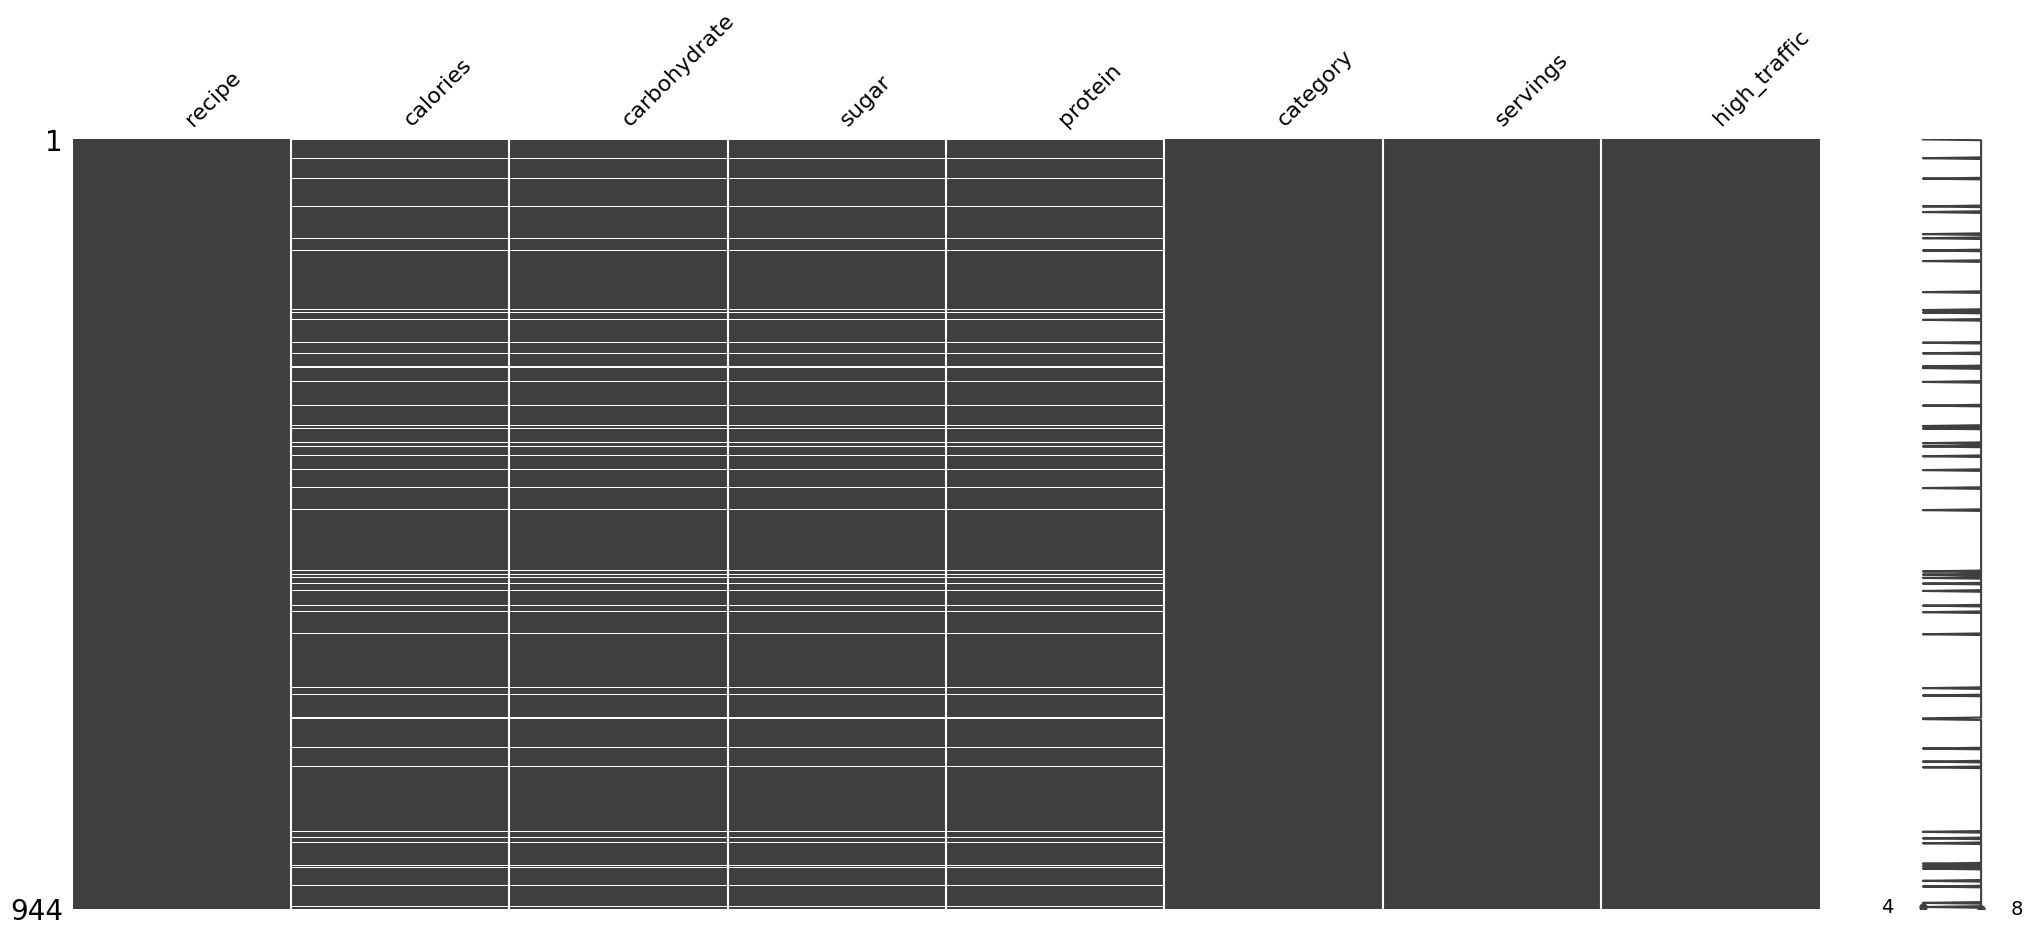

In [14]:
# matrix plot of missing values - all missing values are in the calories, carbohydraate, sugar and protien columns
msno.matrix(df.drop('category_cat', axis=1))
plt.show()

In [15]:
# validate missing values always have the same 4 missing features
df_any_missing = df.loc[~df['recipe'].isin(df_no_missing['recipe'])].sort_values(by = 'recipe').copy()
# print(f"Target class counts with no missing samples:\n{df_any_missing['high_traffic']}\n")
# check if either calories, carbohydrate, sugar or protein (ccsp) are missing, they are all missing
csp_missing = np.where(
    (df_any_missing['calories'].isna()) &
    (df_any_missing['carbohydrate'].isna()) &
    (df_any_missing['sugar'].isna()) & (df_any_missing['protein'].isna())
)[0]

# validate that rows with any missing values are the same as having ccsp all missing
print(f"                                          Count of rows with ANY missing values: {df_any_missing.shape[0]}")
print(f"Count of rows with calories, carbohydrate, sugar and protein (ccsp) all missing: {len(csp_missing)}")

                                          Count of rows with ANY missing values: 52
Count of rows with calories, carbohydrate, sugar and protein (ccsp) all missing: 52


In [16]:
# how do target levels distribute across category in missing samples?
cat_target_missing = pd.crosstab(df_any_missing['category_cat'], df_any_missing['high_traffic'], dropna=False)
df_cat_target_missing = cat_target_missing.reset_index()
# remove the 'high_traffic' name from the column axis
df_cat_target_missing.columns.name = None
df_cat_target_missing['Total Missing'] = df_cat_target_missing['High'] + df_cat_target_missing['NOT High']
print(df_cat_target_missing)
# print(df_cat_target_missing.columns)  # Index(['category_cat', 'High', 'NOT High'], dtype='object')

     category_cat  High  NOT High  Total Missing
0       Beverages     0         0              0
1       Breakfast     0         0              0
2         Chicken     2         3              5
3   ChickenBreast     2         2              4
4         Dessert     5         1              6
5     LunchSnacks     5         2              7
6            Meat     3         2              5
7     OneDishMeal     1         3              4
8            Pork    11         0             11
9          Potato     5         0              5
10      Vegetable     5         0              5


In [17]:
# how do target levels distribute across category in non-missing samples?
cat_target_no_missing = pd.crosstab(df_no_missing['category'], df_no_missing['high_traffic'], dropna=False)
df_cat_target_no_missing = cat_target_no_missing.reset_index()
# remove the 'high_traffic' name from the column axis
df_cat_target_no_missing.columns.name = None
df_cat_target_no_missing['Total NOT Missing'] = df_cat_target_no_missing['High'] + df_cat_target_no_missing['NOT High']
print(df_cat_target_no_missing)
# print(df_cat_target_no_missing.columns)  # Index(['category_cat', 'High', 'NOT High'], dtype='object')

         category  High  NOT High  Total NOT Missing
0       Beverages     5        87                 92
1       Breakfast    33        73                106
2         Chicken    25        44                 69
3   ChickenBreast    44        50                 94
4         Dessert    48        29                 77
5     LunchSnacks    50        29                 79
6            Meat    56        18                 74
7     OneDishMeal    51        16                 67
8            Pork    66         7                 73
9          Potato    78         5                 83
10      Vegetable    77         1                 78


In [18]:
# build the contingecy table for the Chi^2 test for independence between category and missing values
cat_ind_test = pd.concat([df_cat_target_no_missing['category'], df_cat_target_no_missing['Total NOT Missing'], df_cat_target_missing['Total Missing']], axis=1)
cat_ind_test

,category,Total NOT Missing,Total Missing
0,Beverages,92,0
1,Breakfast,106,0
2,Chicken,69,5
3,ChickenBreast,94,4
4,Dessert,77,6
5,LunchSnacks,79,7
6,Meat,74,5
7,OneDishMeal,67,4
8,Pork,73,11
9,Potato,83,5


In [19]:
# set up and run the test
observed_array_t1 = cat_ind_test[['Total Missing', 'Total NOT Missing']].values
chi2_t1, p_t1, dof_t1, expected_scipy_t1 = stats.chi2_contingency(observed_array_t1)
print("SciPy Expected:\n", expected_scipy_t1, '\n')
print(f"\nH0: category and missing values are independent. p-value = {round(p_t1, 4)}, so reject H0 at alpha=0.05. Values are NOT independent (dependent).\n")

# build the contingecy table for the Chi^2 test for independence between high_traffic and missing values
traffic_missing = df_cat_target_missing[['High', 'NOT High']].sum(axis=0)
traffic_no_missing = df_cat_target_no_missing[['High', 'NOT High']].sum(axis=0)

traffic_ind_test = pd.concat([traffic_missing, traffic_no_missing], axis=1)
traffic_ind_test.columns = ['Total Missing', 'Total NOT Missing']
# check expected values
traffic_ind_test

SciPy Expected:
 [[  5.06779661  86.93220339]
 [  5.83898305 100.16101695]
 [  4.07627119  69.92372881]
 [  5.39830508  92.60169492]
 [  4.5720339   78.4279661 ]
 [  4.73728814  81.26271186]
 [  4.35169492  74.64830508]
 [  3.91101695  67.08898305]
 [  4.62711864  79.37288136]
 [  4.84745763  83.15254237]
 [  4.5720339   78.4279661 ]] 


H0: category and missing values are independent. p-value = 0.01, so reject H0 at alpha=0.05. Values are NOT independent (dependent).



,Total Missing,Total NOT Missing
High,39,533
NOT High,13,359


In [20]:
# set up and run the test
observed_array_t2 = traffic_ind_test[['Total Missing', 'Total NOT Missing']].values
chi2_t2, p_t2, dof_t2, expected_scipy_t2 = stats.chi2_contingency(observed_array_t2)
# print("SciPy Expected:\n", expected_scipy_t2, '\n')
print(f"\nH0: traffic (target) and missing values are independent. p-value = {round(p_t2, 4)}, so reject H0 at alpha=0.05. Values are NOT independent (dependent).")


H0: traffic (target) and missing values are independent. p-value = 0.0412, so reject H0 at alpha=0.05. Values are NOT independent (dependent).


## Data validation summary

1. Data provided contained 947 rows (samples) with each row representing a recipe.
2. No duplicate recipes were found.
3. Each row contained 8 columns (features): `recipe, calories, carbohydrate, sugar, protein, category, servings` and `high_traffic`
4. Each row represents a recipe and is identified by a unique number from 1 to 947 in the `recipe` column. No cleaning of this column was required.
5. The `calories` column was assumed to be the total calories per serving. These values were inconsistent with the `carbohydrate`, `sugar`, and `protein` columns in that 40% of the samples had more calories from (carbohydrates + sugar + protein) than there were total calories. This column was dropped from consideration as a feature in this analysis because of the inconsistency.
6. The `carbohydrate`, `sugar`, and `protein` columns are numbers representing the grams of each per serving in each recipe. Missing data for these values occurred as a group where all 3 of these values were either all present or all 3 were missing.  There were 52 rows/samples where these values were missing representing 5.5% of the data. Because missing values exceeded 5%, these values were imputed in the **Model Development** section.
7. To select an appropriate imputation method, the type of missingness needed to be determined. The strongest evidence for the missing data in the `carbohydrate`, `sugar`, and `protein` columns is that it is **Missing at Random (MAR)**.
8. The `category` columns represent the recipe type. The project documentation listed 10 unique categories, but 11 were found in the data. The ***Chicken Breast*** was not listed in the documentation and was assumed to be mutually exclusive of the ***Chicken*** category. <font color="red"><b>This assumption should be confirmed by the team.</b></font>. No cleaning of this column was required, but they were one-hot encoded just prior to model building.
9. The `servings` column contained the following string values: "1", "2", "4", "6", "4 as a snack", and "6 as a snack". Three samples contained the phrase "as a snack". These samples were dropped because they represented less the 0.5% of the data. The remaining values were converted to a number (integer).
10. The `high_traffic` column is the target variable we are modeling. It contained either a sting value **High** or was empty (missing value). The missing values were assumed to be recipes that were **not** high traffic and were replaced with the string **NOT High**.  The **High** and **NOT High** values were later encoded as 1 and 0 respectively just prior to model building.
11. The `high_traffic` target showed mild class imbalance which informed the model development metric.